In [21]:
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
books_df = pd.read_csv('Books.csv')
users_df = pd.read_csv('Users.csv')
ratings_df = pd.read_csv('Ratings.csv')

C:\Users\beher\AppData\Local\Temp\ipykernel_30500\91010480.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv')


In [3]:
books_df.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(books_df.shape)
print(users_df.shape)
print(ratings_df.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [7]:
merged_df = pd.merge(ratings_df, books_df, on='ISBN')
merged_df = pd.merge(merged_df, users_df, on='User-ID')

print("\nMerged Dataset:")
merged_df.head()
# print("\nColumns:", merged_df.columns)
# print("\nShape:", merged_df.shape)
# print("\nNull values:\n", merged_df.isnull().sum())


Merged Dataset:


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0


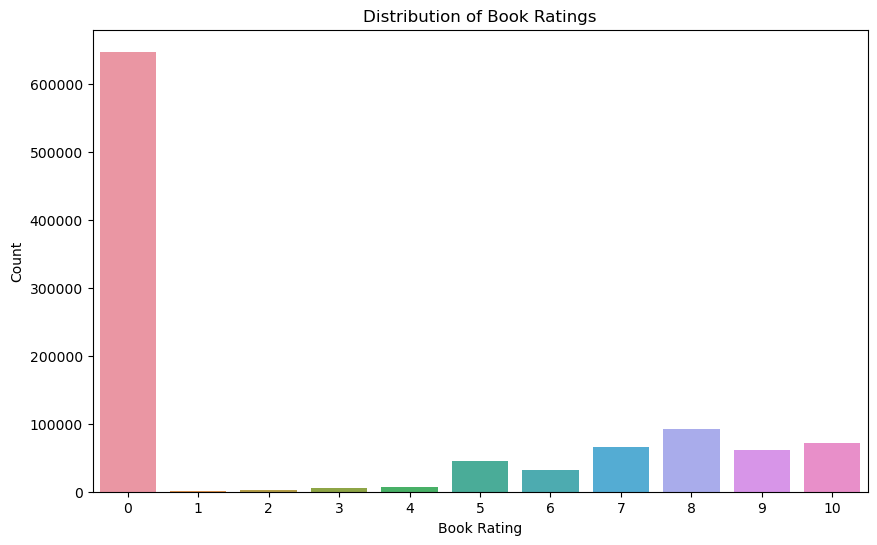


Average Rating by Book Author (Top 10, authors with more than 5 books):
 Book-Author
Michiro Ueyama                     10.000000
Federal Aviation Administration    10.000000
Laura Numeroff Joffe               10.000000
David R. Hawkins                   10.000000
Dick Dudley                        10.000000
Pete Abrams                         9.888889
Steve Goodier                       9.833333
Simon Furman                        9.777778
Mitsumasa Anno                      9.636364
C. COCO DE YOUNG                    9.500000
Name: Book-Rating, dtype: float64

Number of Ratings per User (Top 10):
 User-ID
11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
212898     4289
278418     3996
76352      3329
110973     2971
235105     2943
Name: Book-Rating, dtype: int64


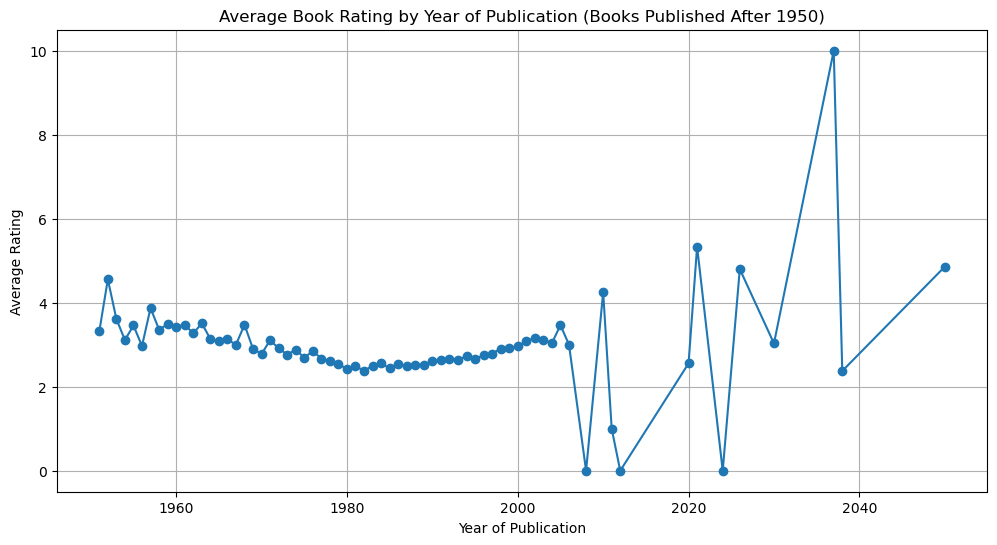

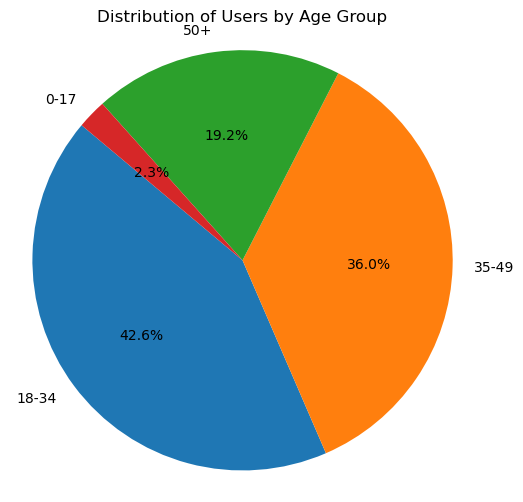

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=merged_df)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

# Average rating by book author
author_book_counts = merged_df['Book-Author'].value_counts()
authors_more_than_5_books = author_book_counts[author_book_counts > 5].index
filtered_df = merged_df[merged_df['Book-Author'].isin(authors_more_than_5_books)]
avg_rating_by_author = filtered_df.groupby('Book-Author')['Book-Rating'].mean().sort_values(ascending=False).head(10)
print("\nAverage Rating by Book Author (Top 10, authors with more than 5 books):\n", avg_rating_by_author)

# Number of ratings per user
ratings_per_user = merged_df.groupby('User-ID')['Book-Rating'].count().sort_values(ascending=False)
print("\nNumber of Ratings per User (Top 10):\n", ratings_per_user.head(10))

# Average rating by year of publication after 1950
merged_df['Year-Of-Publication'] = pd.to_numeric(merged_df['Year-Of-Publication'], errors='coerce').astype('Int64')
filtered_df = merged_df[merged_df['Year-Of-Publication'] > 1950]
avg_rating_by_year = filtered_df.groupby('Year-Of-Publication')['Book-Rating'].mean()
plt.figure(figsize=(12, 6))
avg_rating_by_year.plot(marker='o')
plt.title('Average Book Rating by Year of Publication (Books Published After 1950)')
plt.xlabel('Year of Publication')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# Users age group
bins = [0, 17, 34, 49, 150]  
labels = ['0-17', '18-34', '35-49', '50+']
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels, right=False)
age_group_counts = merged_df['Age Group'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Users by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Popularity based filtering

In [9]:
num_ratings = merged_df.groupby("Book-Title").count()['Book-Rating'].reset_index()
num_ratings.rename(columns = {'Book-Rating':'num_ratings'},inplace = True)
num_ratings

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [10]:
avg_ratings = merged_df.groupby("Book-Title").mean()['Book-Rating'].reset_index()
avg_ratings.rename(columns = {'Book-Rating':'avg_ratings'},inplace = True)
avg_ratings

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [11]:
popular_books = num_ratings.merge(avg_ratings, on = 'Book-Title')
popular_books_filtered = popular_books[popular_books['num_ratings'] >= 250].sort_values('avg_ratings',ascending= False).head(50)
popular_books_df = popular_books_filtered.merge(books_df, on = 'Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]

In [38]:
popular_books_df['avg_ratings'] = popular_books_df['avg_ratings'].round(1)

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.9
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.8
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.7
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.5
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.2
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.0
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.9
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.9
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.9
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.7


In [39]:
pickle.dump(popular_books_df,open('popular_books.pkl','wb'))

### Content based filtering

In [27]:
content_df = merged_df[['Book-Title', 'Book-Author', 'Publisher']].drop_duplicates(subset=['Book-Title'])

content_df['Content'] = content_df.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)


def get_content_based_recommendations(book_title):
    tfidf_vectorizer = TfidfVectorizer()
    content_matrix = tfidf_vectorizer.fit_transform(content_df['Content'])


    svd = TruncatedSVD(n_components=100)  
    reduced_content_matrix = svd.fit_transform(content_matrix)

    try:
        index = content_df[content_df['Book-Title'] == book_title].index[0]
    except IndexError:
        return f'Book title "{book_title}" not found in the dataset.'

    similarity_scores = linear_kernel(reduced_content_matrix[index:index+1], reduced_content_matrix).flatten()
    similar_indices = similarity_scores.argsort()[::-1][1:21]

    valid_indices = [i for i in similar_indices if i < len(content_df)]
    
    recommendations = content_df.iloc[valid_indices]['Book-Title'].values
    return list(recommendations)


### Collaborative based filtering


In [30]:
x = merged_df.groupby('User-ID').count()['Book-Rating'] > 150
good_users = x[x].index
ratings_filtered = merged_df[merged_df['User-ID'].isin(good_users)]
y = ratings_filtered.groupby('Book-Title').count()['Book-Rating'] >= 25
famous_books = y[y].index
final_ratings = ratings_filtered[ratings_filtered['Book-Title'].isin(famous_books)]
final_ratings = final_ratings[['Book-Title','User-ID','Book-Rating']].reset_index()
final_ratings
table = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
table.fillna(0,inplace=True)

similarity_scores = cosine_similarity(table)

def get_collaborative_based_recommendations(book_title):
    index = np.where(table.index == book_title)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:21]

    recommended_movies = []
    for i in similar_items:
        item = []
        temp_df = books_df[books_df['Book-Title'] == table.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        recommended_movies.append(item[0])
    return recommended_movies




### Hybrid Filtering

In [40]:
def get_hybrid_recommendations(book_title):
    try:
        top_n = 10
        content_based_recommendations = get_content_based_recommendations(book_title)
        collaborative_filtering_recommendations = get_collaborative_based_recommendations(book_title)

        content_based_scores = {books: (top_n - i) * 0.3 for i, books in enumerate(content_based_recommendations)}
        collaborative_filtering_scores = {books: (top_n - i) * 0.7 for i, books in enumerate(collaborative_filtering_recommendations)}
        
        hybrid_scores = {}
        for books, score in content_based_scores.items():
            if books in hybrid_scores:
                hybrid_scores[books] += score
            else:
                hybrid_scores[books] = score
                
        for books, score in collaborative_filtering_scores.items():
            if books in hybrid_scores:
                hybrid_scores[books] += score
            else:
                hybrid_scores[books] = score
                
        sorted_hybrid_recommendations = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)
        hybrid_recommendations = [books for books, score in sorted_hybrid_recommendations[:top_n]]
    except:
        hybrid_recommendations = get_content_based_recommendations(book_title)[:10]

    data = []
    for i in hybrid_recommendations:
        objects = []
        df = books_df[books_df['Book-Title'] == i]
        objects.extend(list(df.drop_duplicates('Book-Title')['Book-Title'].values))
        objects.extend(list(df.drop_duplicates('Book-Title')['Book-Author'].values))
        objects.extend(list(df.drop_duplicates('Book-Title')['Image-URL-M'].values))
 
        data.append(objects)
    
    return data


get_hybrid_recommendations('Harry Potter and the Prisoner of Azkaban (Book 3)')



[['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg'],
 ['Valentine (Tor Horror)',
  'S.P. Somtow',
  'http://images.amazon.com/images/P/0812512405.01.MZZZZZZZ.jpg'],
 ['Charlie and the Chocol

In [34]:
pickle.dump(table,open('table.pkl','wb'))
pickle.dump(books_df,open('books.pkl','wb'))
pickle.dump(content_df,open('content-based.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))